In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
train = pd.DataFrame(pd.read_csv("sample_data/mnist_train_small.csv"))

In [0]:
testImage = np.reshape(np.array(train.iloc[29][1:]),[28,28])

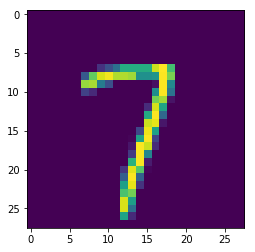

In [0]:
plt.imshow(testImage)

In [0]:
Y = train['6']
X = train.drop(['6'],axis = 1).copy()

In [0]:
#Making Label vector One-Hot Encoded

def convOneHot(num):
  tempList = [0]*10
  tempList[num] = 1
  return tempList

OneHotEncodedData = []

for i in range(len(Y)):
  OneHotEncodedData.append(convOneHot(Y.iloc[i]))
OneHotEncodedData = np.array(OneHotEncodedData)
Y = OneHotEncodedData
print(OneHotEncodedData)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [0]:
inpShape = list(X.shape)
labelsShape = list(OneHotEncodedData.shape)
featureLen = len(X.T)

print(inpShape)

[19999, 784]


In [0]:
#Making placeholder rooms
tfData = tf.placeholder(tf.float64,[None,784])
tfLabels = tf.placeholder(tf.float64,[None,10])

#Making variable rooms
factor = 100
W1 = tf.Variable(np.random.randn(featureLen,featureLen)/factor)
W1Out = tf.nn.relu(tf.matmul(tfData,W1))
W2 = tf.Variable(np.random.randn(featureLen,featureLen)/factor)
W2Out = tf.nn.relu(tf.matmul(W1Out,W2))
W3 = tf.Variable(np.random.randn(featureLen,featureLen)/factor)
W3Out = tf.nn.relu(tf.matmul(W2Out,W3))
OPWeights = tf.Variable(np.random.randn(featureLen,10)/factor)
OP = tf.nn.sigmoid((tf.matmul(W3Out,OPWeights)))

In [0]:
CostFunctionError = tf.reduce_mean(tf.square(OP-tfLabels))
Optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
Minimizer = Optimizer.minimize(CostFunctionError)
Init = tf.global_variables_initializer()


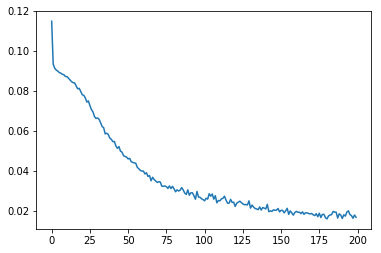

In [0]:
from IPython.display import clear_output

Batch_Size = 1000
with tf.Session() as S:
  iterations = 200
  S.run(Init)
  error = []
  for i in range(iterations):
    RandomIndices = np.random.randint(0,len(X),size = Batch_Size)
    Data2Feed = {tfData:np.array(pd.DataFrame(X).iloc[RandomIndices]).reshape(Batch_Size,featureLen),
                tfLabels:np.array(pd.DataFrame(Y).iloc[RandomIndices]).reshape(Batch_Size,10)}
    S.run(Minimizer,feed_dict = Data2Feed)
    CE = S.run([CostFunctionError],feed_dict = Data2Feed)
    print("Current Cost: ",CE," Current Iteration: ",i)
    error.append(CE)
    clear_output(True)
  TW = S.run([W1,W2,W3,OPWeights])
  plt.plot(error)

In [0]:
test = pd.DataFrame(pd.read_csv("sample_data/mnist_test.csv"))
testY = test['7']
testX = test.drop(['7'],axis = 1).copy()
def ReLU(x):
    return x * (x > 0)
def sigmoid(x):
  return 1/(1+np.exp(-x))
W1Out = ReLU(np.dot(testX,TW[0]))
W2Out = ReLU(np.dot(W1Out,TW[1]))
W3Out = ReLU(np.dot(W2Out,TW[2]))
FinalOut = sigmoid(np.dot(W3Out,TW[3]))

finalAns = []
for i in range(0,len(testX)):
   finalAns.append(np.argmax(FinalOut[i]))
    
finalAns = np.array(finalAns)
from sklearn.metrics import accuracy_score
print(accuracy_score(finalAns,testY)*100," %")


91.15911591159116  %
